In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [6]:
m_2009 = pd.read_csv('movies_2009_2018_df.csv')
m_1990 = pd.read_csv('movies_1990_2008.csv')
raw_dfs = [m_2009, m_1990]
clean_dfs = []
for df in raw_dfs:
    df = df.dropna(subset=['imdbID', 'BoxOffice'])
    df['imdbID'] = df['imdbID'].apply(lambda x: int(x[2:]))
    df = df.set_index('imdbID')
    df = df[df.index.duplicated()==False]
    clean_dfs.append(df)
    
m_all = pd.concat(clean_dfs,axis=0)
m_all = m_all[m_all.index.duplicated()==False]

/Users/mgbvox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/mgbvox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [7]:
'''Processing'''

metadata = pd.read_csv('movies_metadata.csv', low_memory=False).dropna(subset=['imdb_id'])
metadata = metadata[metadata['imdb_id'].str.contains('tt')]
metadata['imdb_id'] = metadata['imdb_id'].apply(lambda x: int(x[2:]))

metadata = metadata.set_index(metadata['imdb_id'], drop=True)

metadata = metadata[metadata['budget'].str.isnumeric()]

to_float = ['revenue','budget']
for c in to_float:
    try:
        metadata = metadata[metadata[c].str.isnumeric()]
    except:
        #is already numeric
        pass
    metadata[c] = metadata[c].apply(lambda x: float(x))
    metadata = metadata[metadata[c]>0]

metadata['profit'] = metadata['revenue']-metadata['budget']

metadata = metadata[metadata.index.duplicated()==False]

In [8]:
import re

intersection = m_all['BoxOffice'].index.intersection(metadata['profit'].index)
box_office_profit = pd.concat([m_all['BoxOffice'].loc[intersection], metadata[['profit','id']].loc[intersection]], axis=1)
box_office_profit['BoxOffice'] = box_office_profit['BoxOffice'].apply(lambda x: int(re.sub('[^0-9]','',x)))
b_idx = box_office_profit['id'].apply(int)


In [9]:
box_office_profit = box_office_profit.set_index(b_idx)

In [10]:
box_office_profit.head()

,BoxOffice,profit,id
id,,,
13183,107453620,55258983.0,13183
10521,58637818,84663461.0,10521
12437,45802315,56353501.0,12437
14560,146336178,157293131.0,14560
14836,75169351,64596398.0,14836


In [11]:
ratings = pd.read_csv('ratings.csv')

In [12]:
r = ratings.groupby('movieId').mean()['rating']

In [13]:
b_idx = box_office_profit.index
r_idx = r.index
intersection = b_idx.intersection(r_idx)

In [14]:
b_p_r_df = pd.concat([box_office_profit.loc[intersection], r.loc[intersection]], axis=1)[['BoxOffice','profit','rating']]

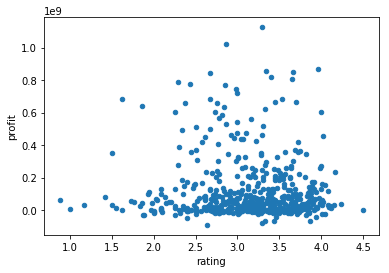

In [17]:
b_p_r_df.plot.scatter('rating','profit')

In [16]:
b_p_r_df.to_csv('box_office_profit_rating.csv')

In [18]:
b_p_r_df.corr()

,BoxOffice,profit,rating
BoxOffice,1.000000,0.906781,-0.026055
profit,0.906781,1.000000,-0.046328
rating,-0.026055,-0.046328,1.000000
